In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm

In [12]:
def simulate_kuramoto(N, K, freq_dist, init_states, time_points):
    """
    N: number of oscillators
    K: coupling strength
    freq_dist: frequency distribution
    init_states: initial states of oscillators
    time_points: time points to simulate
    """
    frequencies = np.array([freq_dist() for _ in range(N)])

    def kuramoto(t, theta):
        dtheta = frequencies - (K/N) * np.sum(np.sin(theta[:, None] - theta[None, :]), axis=1)
        return dtheta

    sol = solve_ivp(kuramoto, (time_points[0], time_points[-1]), init_states, t_eval=time_points)
    return sol.y

# Using Gaussian Frequency Sampling [$\mu = 0, \sigma^2 = 1$]

In [13]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.normal(0, 1)

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

## Low Coupling Strength [$K = 0.01$]

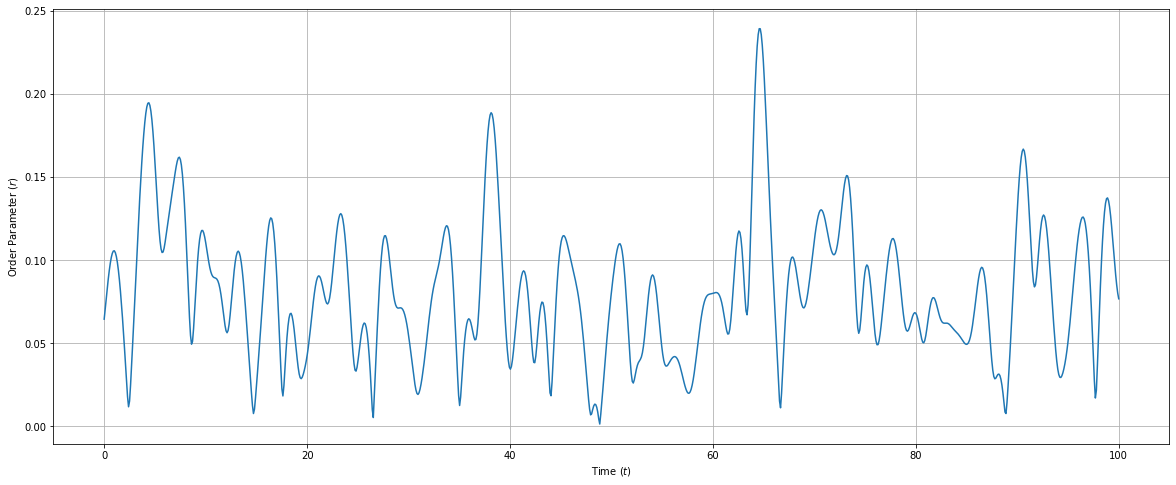

In [14]:
K = 0.01
states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_low_coupling_gaussian.png", transparent=True, bbox_inches='tight')
plt.show()

## High Coupling Strength [$K = 10$]

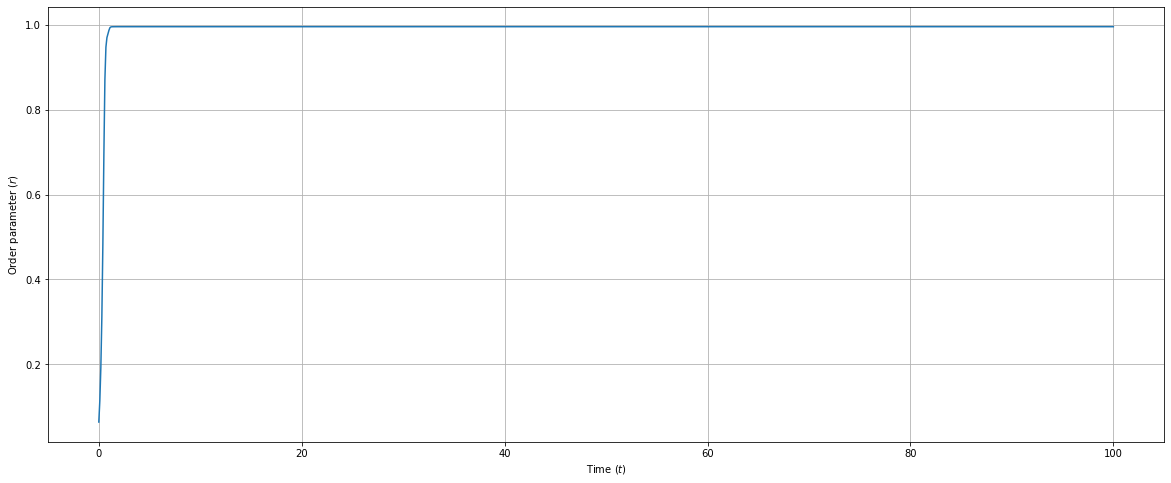

In [15]:
K = 10
states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_high_coupling_gaussian.png", transparent=True, bbox_inches='tight')
plt.show()

## Limiting Order Parameter ($r_\infty$) vs. Coupling Strength ($K$)

In [16]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [01:41<00:00,  9.82it/s]


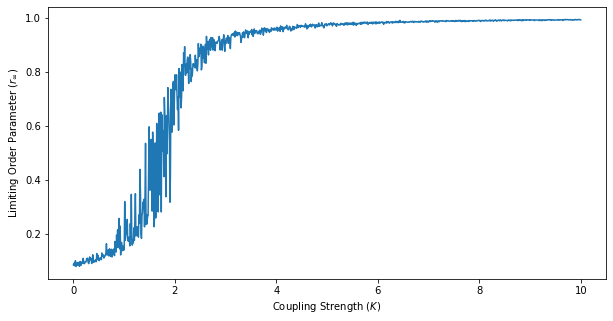

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_gaussian.png", transparent=True, bbox_inches='tight')
plt.show()

# Using Cauchy Frequency Sampling [$x_0 = 0, \gamma = 1$]

In [18]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.standard_cauchy()

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

## Low Coupling Strength [$K = 0.01$]

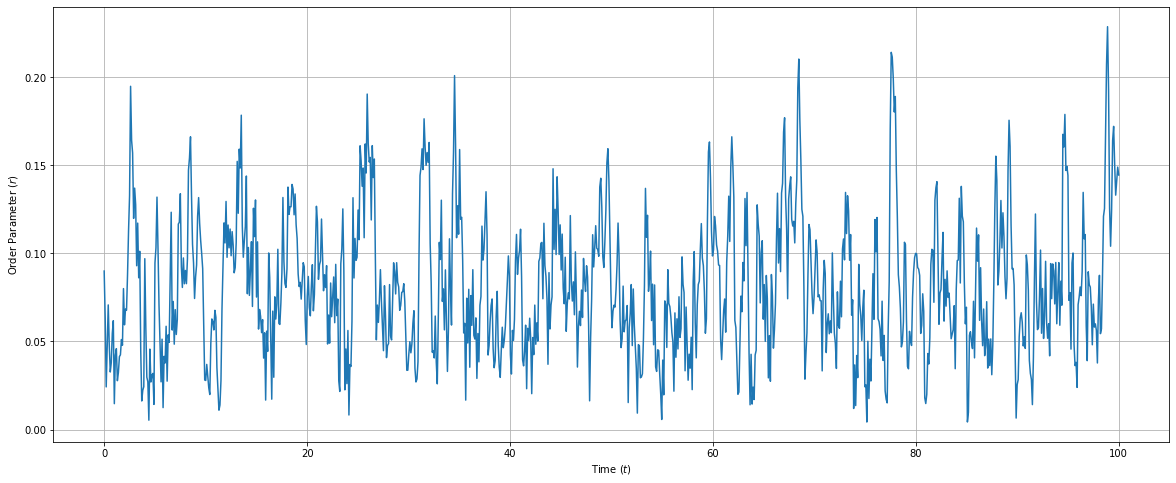

In [19]:
K = 0.01
states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_low_coupling_cauchy.png", transparent=True, bbox_inches='tight')
plt.show()

## High Coupling Strength [$K = 10$]

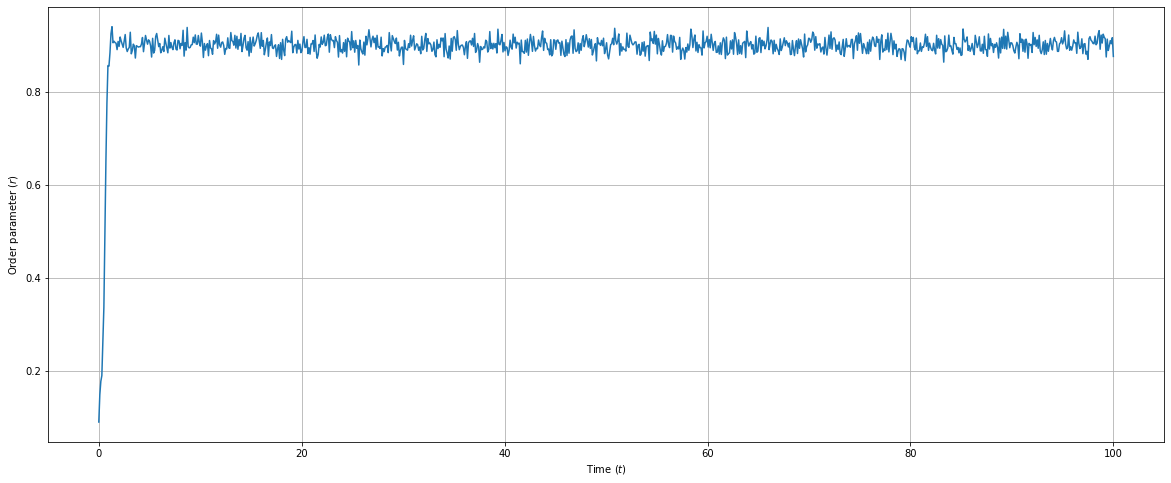

In [20]:
K = 10
states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_high_coupling_cauchy.png", transparent=True, bbox_inches='tight')
plt.show()

## Limiting Order Parameter ($r_\infty$) vs. Coupling Strength ($K$)

In [21]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_kuramoto(N, K, freq_dist, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [06:20<00:00,  2.63it/s]


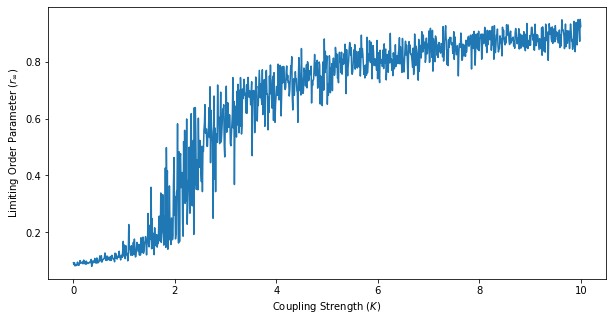

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_cauchy.png", transparent=True, bbox_inches='tight')
plt.show()

# Using Experimental Coupling Functions
Throughout, we shall sample frequences from Standard Gaussian and take $K = 1$ whenever explicitly needed.

In [23]:
def simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points):
    """
    N: number of oscillators
    K: coupling strength
    freq_dist: frequency distribution
    coupling_function: coupling function
    init_states: initial states of oscillators
    time_points: time points to simulate
    """
    frequencies = np.array([freq_dist() for _ in range(N)])

    def kuramoto(t, theta):
        dtheta = frequencies - (K/N) * np.sum(coupling_function(theta[:, None] - theta[None, :]), axis=1)
        return dtheta

    sol = solve_ivp(kuramoto, (time_points[0], time_points[-1]), init_states, t_eval=time_points)
    return sol.y

## $C(\theta) = \sin^2(\theta)$

In [24]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.normal(0, 1)
coupling_function = lambda x: np.sin(x)**2

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

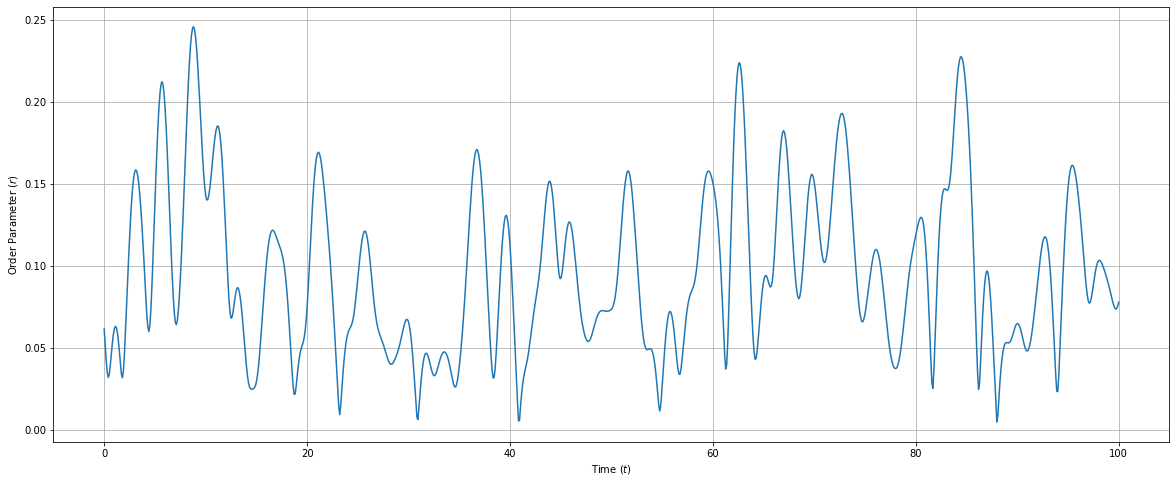

In [25]:
K = 1
states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_experimental2.png", transparent=True, bbox_inches='tight')
plt.show()

In [26]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [01:22<00:00, 12.14it/s]


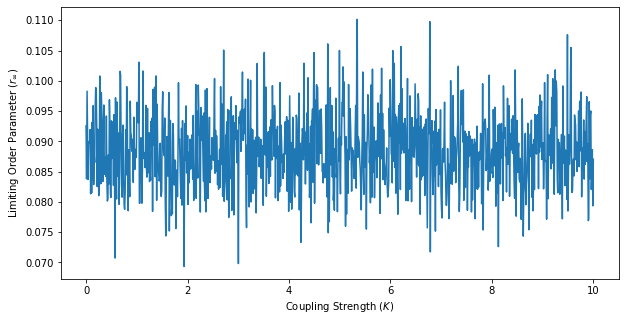

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_experimental2.png", transparent=True, bbox_inches='tight')
plt.show()

## $C(\theta) = \sin^3(\theta)$

In [28]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.normal(0, 1)
coupling_function = lambda x: np.sin(x)**3

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

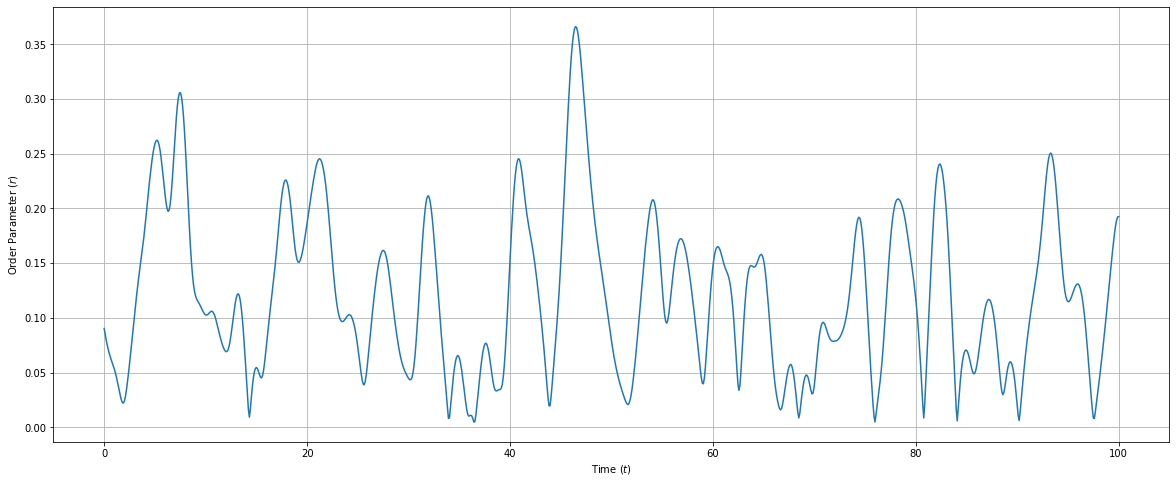

In [29]:
K = 1
states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_experimental3.png", transparent=True, bbox_inches='tight')
plt.show()

In [30]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [03:46<00:00,  4.41it/s]


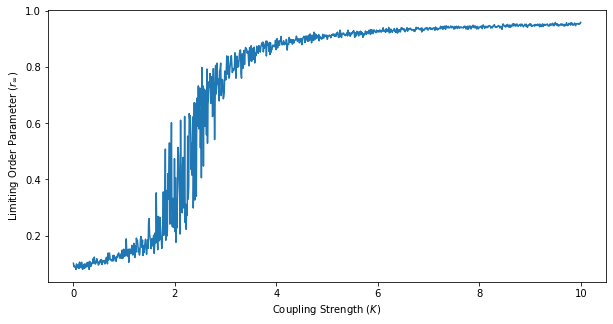

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_experimental3.png", transparent=True, bbox_inches='tight')
plt.show()

## $C(\theta) = \sin^5(\theta)$

In [32]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.normal(0, 1)
coupling_function = lambda x: np.sin(x)**5

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

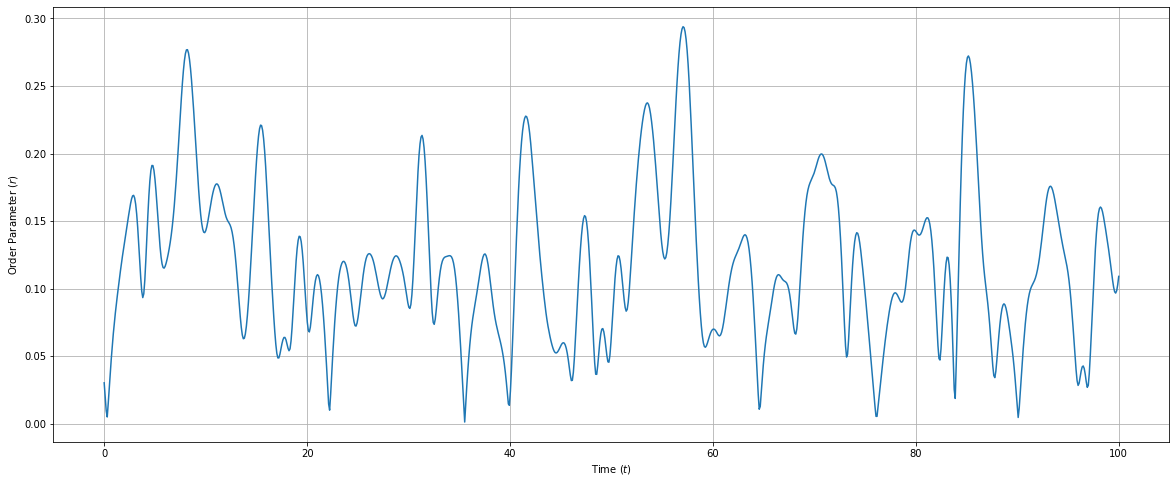

In [33]:
K = 1
states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_experimental5.png", transparent=True, bbox_inches='tight')
plt.show()

In [34]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [04:17<00:00,  3.88it/s]


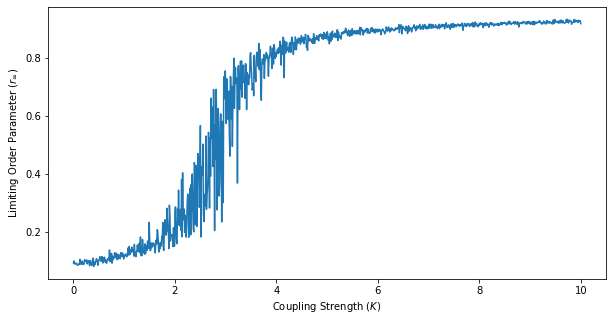

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_experimental5.png", transparent=True, bbox_inches='tight')
plt.show()

## $C(\theta) = \sin^{101}(\theta)$

In [36]:
time_points = np.linspace(0, 100, 1000)
freq_dist = lambda: np.random.normal(0, 1)
coupling_function = lambda x: np.sin(x)**101

N = 100
init_states = np.random.uniform(-np.pi, np.pi, N)

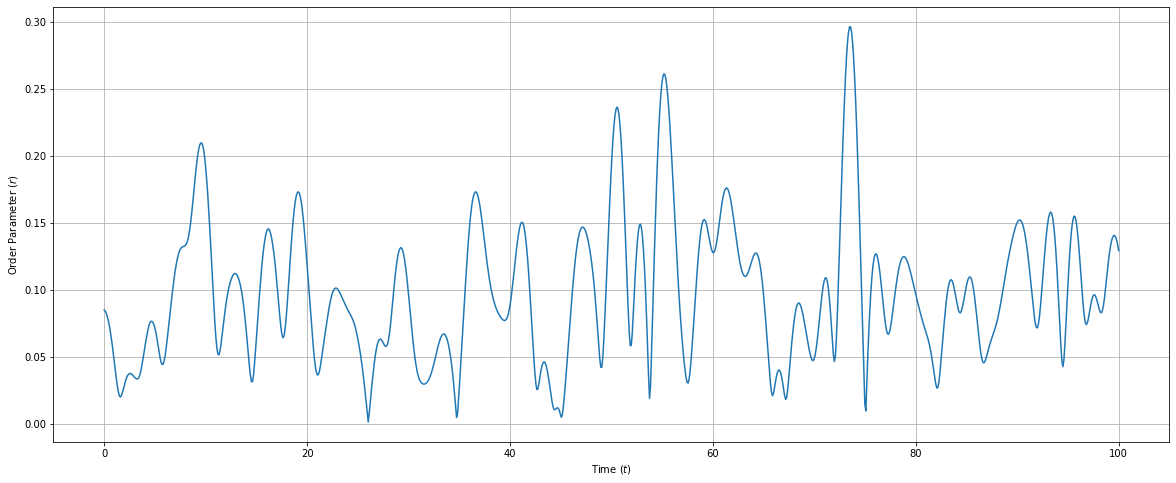

In [37]:
K = 1
states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
order_param = np.mean(np.exp(1j * states), axis=0)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(time_points, np.abs(order_param))
ax.set_xlabel('Time ($t$)')
ax.set_ylabel('Order Parameter ($r$)')
ax.grid()
plt.savefig("figures/kuramoto_order_param_evolution_experimental101.png", transparent=True, bbox_inches='tight')
plt.show()

In [38]:
K_values = np.linspace(0, 10, 1000)
limiting_order_params = []

for K in tqdm(K_values):
    states = simulate_experimental_kuramoto(N, K, freq_dist, coupling_function, init_states, time_points)
    order_param = np.mean(np.exp(1j * states), axis=0)
    weights = np.exp(np.linspace(0, 1, len(order_param)))
    weighted_avg = np.average(np.abs(order_param), weights=weights)
    limiting_order_params.append(weighted_avg)

100%|██████████| 1000/1000 [15:23<00:00,  1.08it/s]


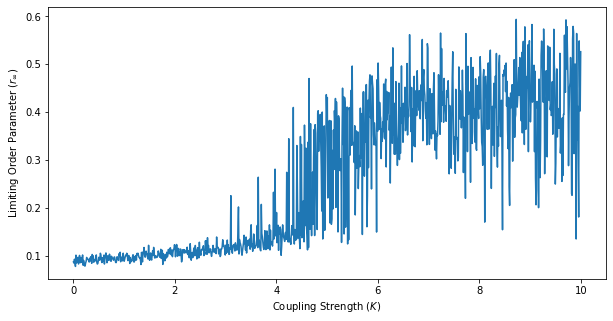

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(K_values, limiting_order_params)
ax.set_xlabel('Coupling Strength ($K$)')
ax.set_ylabel('Limiting Order Parameter ($r_\infty$)')
plt.savefig("figures/kuramoto_limiting_order_param_vs_coupling_experimental101.png", transparent=True, bbox_inches='tight')
plt.show()